<a href="https://colab.research.google.com/github/sanjogmish/Health-Insurance-Cross-Sell-Prediction/blob/main/HEALTH_INSURANCE_CROSS_SELL_PREDICTION_Modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

Our client is an Insurance company that has provided Health Insurance to its customers now they need your help in building a model to predict whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company.

An insurance policy is an arrangement by which a company undertakes to provide a guarantee of compensation for specified loss, damage, illness, or death in return for the payment of a specified premium. A premium is a sum of money that the customer needs to pay regularly to an insurance company for this guarantee.

For example, you may pay a premium of Rs. 5000 each year for a health insurance cover of Rs. 200,000/- so that if, God forbid, you fall ill and need to be hospitalised in that year, the insurance provider company will bear the cost of hospitalisation etc. for upto Rs. 200,000. Now if you are wondering how can company bear such high hospitalisation cost when it charges a premium of only Rs. 5000/-, that is where the concept of probabilities comes in picture. For example, like you, there may be 100 customers who would be paying a premium of Rs. 5000 every year, but only a few of them (say 2-3) would get hospitalised that year and not everyone. This way everyone shares the risk of everyone else.

Just like medical insurance, there is vehicle insurance where every year customer needs to pay a premium of certain amount to insurance provider company so that in case of unfortunate accident by the vehicle, the insurance provider company will provide a compensation (called ‘sum assured’) to the customer.

Building a model to predict whether a customer would be interested in Vehicle Insurance is extremely helpful for the company because it can then accordingly plan its communication strategy to reach out to those customers and optimise its business model and revenue.

Now, in order to predict, whether the customer would be interested in Vehicle insurance, you have information about demographics (gender, age, region code type), Vehicles (Vehicle Age, Damage), Policy (Premium, sourcing channel) etc.

# **Attribute Information**

1. id :	Unique ID for the customer

2. Gender	: Gender of the customer

3. Age :	Age of the customer

4. Driving_License	0 : Customer does not have DL, 1 : Customer already has DL

5. Region_Code :	Unique code for the region of the customer

6. Previously_Insured	: 1 : Customer already has Vehicle Insurance, 0 : Customer doesn't have Vehicle Insurance

7. Vehicle_Age :	Age of the Vehicle

8. Vehicle_Damage	 :1 : Customer got his/her vehicle damaged in the past. 0 : Customer didn't get his/her vehicle damaged in the past.

9. Annual_Premium	: The amount customer needs to pay as premium in the year

10. PolicySalesChannel :	Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.

11. Vintage :	Number of Days, Customer has been associated with the company

12. Response :	1 : Customer is interested, 0 : Customer is not interested

# NAIVE BAYES CLASSIFIER

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np

In [15]:
X_train = pd.read_csv('/content/drive/MyDrive/Almabetter/Modules/files/X_train.csv')
X_test = pd.read_csv('/content/drive/MyDrive/Almabetter/Modules/files/X_test.csv')
y_train = pd.read_csv('/content/drive/MyDrive/Almabetter/Modules/files/y_train.csv')
y_test = pd.read_csv('/content/drive/MyDrive/Almabetter/Modules/files/y_test.csv')

In [16]:
X_train

,Unnamed: 0,0,1,2,3,4
0,0,-3.634862,0.567972,0.683036,2.030557,-0.008673
1,1,-3.669644,0.722668,-1.291992,1.451597,-0.056891
2,2,-3.204086,-0.771222,0.450132,-0.168602,-0.195269
3,3,2.012598,0.270542,-0.763257,0.574901,0.198322
4,4,-3.134938,-1.337568,0.837789,1.575757,-0.115875
...,...,...,...,...,...,...
373710,373710,1.507338,0.269709,-0.244482,0.300098,-1.815194
373711,373711,2.761216,0.342603,-0.335227,0.640131,2.013998
373712,373712,2.599150,-1.794610,-0.449725,0.633736,0.095408
373713,373713,2.102576,0.985206,1.267618,-1.590183,-0.074555


In [17]:
y_train

,Unnamed: 0,0
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
...,...,...
373710,373710,1
373711,373711,1
373712,373712,1
373713,373713,1


In [18]:
X_train.drop('Unnamed: 0',axis=1,inplace =True)
X_test.drop('Unnamed: 0',axis=1,inplace=True)
y_train.drop('Unnamed: 0',axis=1,inplace=True)
y_test.drop('Unnamed: 0',axis=1,inplace=True)

In [19]:
X_train

,0,1,2,3,4
0,-3.634862,0.567972,0.683036,2.030557,-0.008673
1,-3.669644,0.722668,-1.291992,1.451597,-0.056891
2,-3.204086,-0.771222,0.450132,-0.168602,-0.195269
3,2.012598,0.270542,-0.763257,0.574901,0.198322
4,-3.134938,-1.337568,0.837789,1.575757,-0.115875
...,...,...,...,...,...
373710,1.507338,0.269709,-0.244482,0.300098,-1.815194
373711,2.761216,0.342603,-0.335227,0.640131,2.013998
373712,2.599150,-1.794610,-0.449725,0.633736,0.095408
373713,2.102576,0.985206,1.267618,-1.590183,-0.074555


In [20]:
y_train

,0
0,0
1,0
2,0
3,0
4,0
...,...
373710,1
373711,1
373712,1
373713,1


In [25]:
y_train.values.reshape(-1)

array([0, 0, 0, ..., 1, 1, 1])

In [116]:
from sklearn.naive_bayes import GaussianNB
gaussian_estimator = GaussianNB().fit(X_train.values,y_train.values.reshape(-1))

In [117]:
from sklearn.metrics import accuracy_score, confusion_matrix,recall_score,precision_score,log_loss,f1_score,roc_auc_score,classification_report

In [118]:
import matplotlib.pyplot as plt
import seaborn as sns

In [123]:
def get_metric(model):

    train_preds = model.predict(X_train.values)
    test_preds = model.predict(X_test.values)

    print("The classification report for training is \n")
    print(classification_report(y_train.values.reshape(-1),train_preds),"\n")
    
    print("The classification report for testing is \n")
    print(classification_report(y_test.values.reshape(-1),test_preds),"\n")
    
    
    metrics = [roc_auc_score,accuracy_score,recall_score,precision_score,log_loss,f1_score]
    metric_name = ['Roc Auc','Accuracy','Recall','Precision','Log loss','F1 score']
    
    zipped_list = []
    for i in metrics:
        tr = round(i(y_train.values.reshape(-1),train_preds),2)
        ts = round(i(y_test.values.reshape(-1),test_preds),2)
        zipped_list.append((tr,ts))
    metric_df = pd.DataFrame(zipped_list,index=metric_name,columns=['Train','Test'])

    for i in [confusion_matrix(y_train.values.reshape(-1),train_preds) , confusion_matrix(y_test.values.reshape(-1),test_preds)]:
      print('Confusion Matrix for train set \n',i,'\n')
    
    true_dict = pd.Series(y_test.values.reshape(-1)).value_counts().to_dict()
    pred_dict = pd.Series(test_preds).value_counts().to_dict()

    tmp_df = pd.DataFrame(zip(true_dict.values(),pred_dict.values()),columns = ['Actual','Predicted'],index=[0,1])
    tmp_df = tmp_df.div(tmp_df.sum(axis=0), axis=1)
    tmp_df.plot(kind='bar', rot=0, xlabel='Response',ylabel='Percentages', figsize=(14, 6))
#    plt.ylim((0, 100))
    
    
    return metric_df

The classification report for training is 

              precision    recall  f1-score   support

           0       0.80      0.58      0.67    183758
           1       0.68      0.86      0.76    189957

    accuracy                           0.72    373715
   macro avg       0.74      0.72      0.72    373715
weighted avg       0.74      0.72      0.72    373715
 

The classification report for testing is 

              precision    recall  f1-score   support

           0       0.96      0.47      0.63     65137
           1       0.18      0.84      0.30      9021

    accuracy                           0.52     74158
   macro avg       0.57      0.66      0.47     74158
weighted avg       0.86      0.52      0.59     74158
 

Confusion Matrix for train set 
 [[106832  76926]
 [ 27096 162861]] 

Confusion Matrix for train set 
 [[30833 34304]
 [ 1401  7620]] 



,Train,Test
Roc Auc,0.72,0.66
Accuracy,0.72,0.52
Recall,0.86,0.84
Precision,0.68,0.18
Log loss,9.61,16.63
F1 score,0.76,0.30


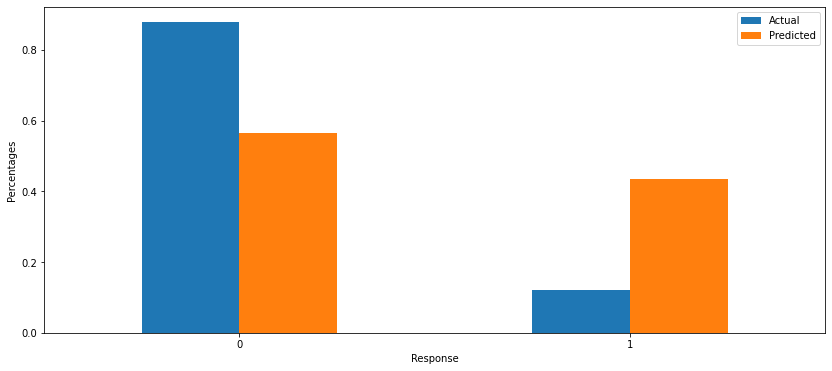

In [124]:
get_metric(gaussian_estimator)

# LOGISTIC REGRESSION

In [125]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(fit_intercept=True, max_iter=10000)
clf.fit(X_train.values,y_train.values.reshape(-1))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

The classification report for training is 

              precision    recall  f1-score   support

           0       0.79      0.59      0.68    183758
           1       0.68      0.85      0.76    189957

    accuracy                           0.72    373715
   macro avg       0.74      0.72      0.72    373715
weighted avg       0.74      0.72      0.72    373715
 

The classification report for testing is 

              precision    recall  f1-score   support

           0       0.96      0.48      0.64     65137
           1       0.18      0.84      0.30      9021

    accuracy                           0.52     74158
   macro avg       0.57      0.66      0.47     74158
weighted avg       0.86      0.52      0.60     74158
 

Confusion Matrix for train set 
 [[108248  75510]
 [ 28003 161954]] 

Confusion Matrix for train set 
 [[31315 33822]
 [ 1451  7570]] 



,Train,Test
Roc Auc,0.72,0.66
Accuracy,0.72,0.52
Recall,0.85,0.84
Precision,0.68,0.18
Log loss,9.57,16.43
F1 score,0.76,0.30


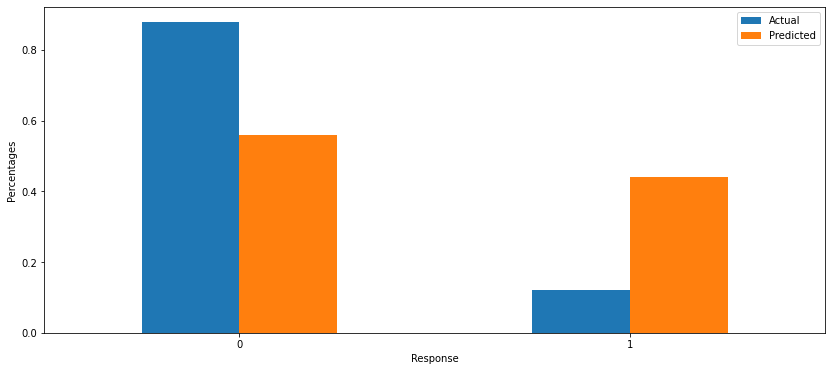

In [126]:
get_metric(clf)

In [127]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import cross_validate

In [129]:
logistic = LogisticRegression()
scoring = ['accuracy']
scores = cross_validate(logistic,X_train, y_train, scoring = scoring, cv = 5, return_train_score=True,return_estimator=True,verbose = 10)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  ................................................................
[CV] ............. , accuracy=(train=0.723, test=0.722), total=   0.6s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ............. , accuracy=(train=0.722, test=0.725), total=   0.6s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.4s remaining:    0.0s
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ............. , accuracy=(train=0.723, test=0.722), total=   0.6s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.0s remaining:    0.0s
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ............. , accuracy=(train=0.723, test=0.722), total=   0.6s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.7s remaining:    0.0s
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ............. , accuracy=(train=0.723, test=0.723), total=   0.6s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    3.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    3.3s finished


In [130]:
scores['train_accuracy']

array([0.72346909, 0.72240544, 0.72312792, 0.72310116, 0.72298409])

In [131]:
scores['test_accuracy']

array([0.72247568, 0.72497759, 0.72175321, 0.7224623 , 0.72322492])

In [132]:
for model in scores['estimator']:
    print(model.coef_)

[[ 0.39581981 -0.1081677  -0.00307609 -0.01806656 -0.01967801]]
[[ 0.39341959 -0.11418869 -0.00589238  0.00241537 -0.01673801]]
[[ 3.95516468e-01 -1.14755136e-01 -2.98113357e-03  1.77154510e-04
  -1.64461871e-02]]
[[ 0.39565679 -0.1155086  -0.00616604  0.00181305 -0.01859318]]
[[ 0.39535828 -0.11283596 -0.00609895  0.00199659 -0.01856393]]
